In [35]:
import sys 
sys.path.append("C:/Users/isxzl/OneDrive/Code/AutoGeo")
import AutoGeo

# Check hdf4

In [ ]:
from osgeo import gdal
# Replace this with your HDF5 file path
#hdf4_file_path = 'C:/Users/isxzl/OneDrive/Code/AutoGeo/data/MOD04_L2.A2023001.0210.061.2023001132858.hdf'
hdf4_file_path = r'C:\Datasets\Zhejiang20-23RS\LandUse/MCD12Q1.A2019001.h28v05.061.2022169220530.hdf'
#hdf4_file_path=r'C:/Users/isxzl/OneDrive/Code/AutoGeo/data/hdf4/MOD04_L2.A2023001.0350.061.2023001180312.hdf'


print("================================print product involved================================")


hdf4_dataset = gdal.Open(hdf4_file_path)
subdatasets = hdf4_dataset.GetSubDatasets()

for idx, subdataset in enumerate(subdatasets):
    print(f"{idx}: {subdataset[1]}")

print("================================metainfo for each product================================")

from prettytable import PrettyTable
import rasterio

# Create a PrettyTable object
table = PrettyTable()

# Initialize a counter for the index
index = 0

# Iterate over each subdataset
for subdataset in subdatasets:
    subdataset_path = subdataset[0]

    with rasterio.open(subdataset_path) as src:
        # Collect metadata and number of bands
        meta = src.meta
        meta['bands'] = src.count

        # Add field names to the table if it's the first iteration
        if not table.field_names:
            # Add 'index' at the beginning of the field names
            table.field_names = ['index'] + list(meta.keys())

        # Add the metadata to the table
        table.add_row([index] + list(meta.values()))

        # Increment the index
        index += 1

# Print the PrettyTable
print(table)


In [9]:
hdf4_dataset

index,driver,dtype,nodata,width,height,count,crs,transform,bands
0,HDF4Image,uint8,255.0,2400,2400,1,"PROJCS[""unnamed"",GEOGCS[""Unknown datum based upon the custom spheroid"",DATUM[""Not specified (based on custom spheroid)"",SPHEROID[""Custom spheroid"",6371007.181,0]],PRIMEM[""Greenwich"",0],UNIT[""degree"",0.0174532925199433,AUTHORITY[""EPSG"",""9122""]]],PROJECTION[""Sinusoidal""],PARAMETER[""longitude_of_center"",0],PARAMETER[""false_easting"",0],PARAMETER[""false_northing"",0],UNIT[""Meter"",1],AXIS[""Easting"",EAST],AXIS[""Northing"",NORTH]]","| 463.31, 0.00, 11119505.20|| 0.00,-463.31, 4447802.08|| 0.00, 0.00, 1.00|",1
1,HDF4Image,uint8,255.0,2400,2400,1,"PROJCS[""unnamed"",GEOGCS[""Unknown datum based upon the custom spheroid"",DATUM[""Not specified (based on custom spheroid)"",SPHEROID[""Custom spheroid"",6371007.181,0]],PRIMEM[""Greenwich"",0],UNIT[""degree"",0.0174532925199433,AUTHORITY[""EPSG"",""9122""]]],PROJECTION[""Sinusoidal""],PARAMETER[""longitude_of_center"",0],PARAMETER[""false_easting"",0],PARAMETER[""false_northing"",0],UNIT[""Meter"",1],AXIS[""Easting"",EAST],AXIS[""Northing"",NORTH]]","| 463.31, 0.00, 11119505.20|| 0.00,-463.31, 4447802.08|| 0.00, 0.00, 1.00|",1
2,HDF4Image,uint8,255.0,2400,2400,1,"PROJCS[""unnamed"",GEOGCS[""Unknown datum based upon the custom spheroid"",DATUM[""Not specified (based on custom spheroid)"",SPHEROID[""Custom spheroid"",6371007.181,0]],PRIMEM[""Greenwich"",0],UNIT[""degree"",0.0174532925199433,AUTHORITY[""EPSG"",""9122""]]],PROJECTION[""Sinusoidal""],PARAMETER[""longitude_of_center"",0],PARAMETER[""false_easting"",0],PARAMETER[""false_northing"",0],UNIT[""Meter"",1],AXIS[""Easting"",EAST],AXIS[""Northing"",NORTH]]","| 463.31, 0.00, 11119505.20|| 0.00,-463.31, 4447802.08|| 0.00, 0.00, 1.00|",1
3,HDF4Image,uint8,255.0,2400,2400,1,"PROJCS[""unnamed"",GEOGCS[""Unknown datum based upon the custom spheroid"",DATUM[""Not specified (based on custom spheroid)"",SPHEROID[""Custom spheroid"",6371007.181,0]],PRIMEM[""Greenwich"",0],UNIT[""degree"",0.0174532925199433,AUTHORITY[""EPSG"",""9122""]]],PROJECTION[""Sinusoidal""],PARAMETER[""longitude_of_center"",0],PARAMETER[""false_easting"",0],PARAMETER[""false_northing"",0],UNIT[""Meter"",1],AXIS[""Easting"",EAST],AXIS[""Northing"",NORTH]]","| 463.31, 0.00, 11119505.20|| 0.00,-463.31, 4447802.08|| 0.00, 0.00, 1.00|",1
4,HDF4Image,uint8,255.0,2400,2400,1,"PROJCS[""unnamed"",GEOGCS[""Unknown datum based upon the custom spheroid"",DATUM[""Not specified (based on custom spheroid)"",SPHEROID[""Custom spheroid"",6371007.181,0]],PRIMEM[""Greenwich"",0],UNIT[""degree"",0.0174532925199433,AUTHORITY[""EPSG"",""9122""]]],PROJECTION[""Sinusoidal""],PARAMETER[""longitude_of_center"",0],PARAMETER[""false_easting"",0],PARAMETER[""false_northing"",0],UNIT[""Meter"",1],AXIS[""Easting"",EAST],AXIS[""Northing"",NORTH]]","| 463.31, 0.00, 11119505.20|| 0.00,-463.31, 4447802.08|| 0.00, 0.00, 1.00|",1
5,HDF4Image,uint8,255.0,2400,2400,1,"PROJCS[""unnamed"",GEOGCS[""Unknown datum based upon the custom spheroid"",DATUM[""Not specified (based on custom spheroid)"",SPHEROID[""Custom spheroid"",6371007.181,0]],PRIMEM[""Greenwich"",0],UNIT[""degree"",0.0174532925199433,AUTHORITY[""EPSG"",""9122""]]],PROJECTION[""Sinusoidal""],PARAMETER[""longitude_of_center"",0],PARAMETER[""false_easting"",0],PARAMETER[""false_northing"",0],UNIT[""Meter"",1],AXIS[""Easting"",EAST],AXIS[""Northing"",NORTH]]","| 463.31, 0.00, 11119505.20|| 0.00,-463.31, 4447802.08|| 0.00, 0.00, 1.00|",1
6,HDF4Image,uint8,255.0,2400,2400,1,"PROJCS[""unnamed"",GEOGCS[""Unknown datum based upon the custom spheroid"",DATUM[""Not specified (based on custom spheroid)"",SPHEROID[""Custom spheroid"",6371007.181,0]],PRIMEM[""Greenwich"",0],UNIT[""degree"",0.0174532925199433,AUTHORITY[""EPSG"",""9122""]]],PROJECTION[""Sinusoidal""],PARAMETER[""longitude_of_center"",0],PARAMETER[""false_easting"",0],PARAMETER[""false_northing"",0],UNIT[""Meter"",1],AXIS[""Easting"",EAST],AXIS[""Northing"",NORTH]]","| 463.31,

# Load MODIS
Given: path of pdf, band name

Wnated: Xarray

## Single

In [13]:
import sys 
sys.path.append("C:/Users/isxzl/OneDrive/Code/AutoGeo")
from sample.unit_test import find_files_with_extension
from sample.hdf import load_modis
directory= r'C:\Datasets\Zhejiang20-23RS\LandUse'

dsl=find_files_with_extension(directory,"hdf")
ds1= load_modis(dsl[0],band='LC_Type4')

ds2= load_modis(dsl[1],band='LC_Type4')
ds2= load_modis(dsl[3],band='LC_Type4')
#ds_sample=xr.merge([ds1,ds2])
#ds_combined.sel(time="2019-12-31T00:00:00.000000000")["LC_Type4"].plot()


## Batch

In [2]:
import sys 
sys.path.append("C:/Users/isxzl/OneDrive/Code/AutoGeo")
from sample.hdf import load_modis_batch
directory= r'C:\Datasets\Zhejiang20-23RS\LandUse'

merged_ds=load_modis_batch(directory)   
    #return merged_ds.rio.write_crs("EPSG:4326", inplace=True)
#merged_ds.to_netcdf(path=os.path.join(directory,"Merged.nc"), format='NETCDF4')

Load merged file


## Plot

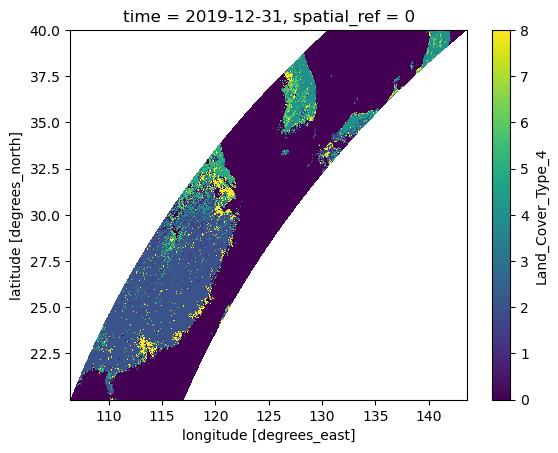

In [33]:

data_slice = merged_ds.sel(time="2019-12-31T00:00:00.000000000")["LC_Type4"]
data_subset = data_slice#.sel(longitude=slice(114, 120), latitude=slice(23, 27)) #
data_subset.plot()
